<a href="https://colab.research.google.com/github/wolfdale229/roock-paper-scisors/blob/main/Rock_Paper_Scisors_Classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using Keras

In [ ]:
import os, shutil
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

base_path = os.path.abspath('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors')
train_dir = '/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/train_set'
test_dir = '/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/test_set'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/validation_set'

In [ ]:
from google.colab import  drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Getting the Data

In [ ]:
# !kaggle datasets download -d drgfreeman/rockpaperscissors
# !mv rockpaperscissors.zip '/content/drive/MyDrive/Colab Notebooks/rockpaperscissors'
# os.chdir('/content/drive/MyDrive/Colab Notebooks')

# subfolders in the training set for the three classes
# file_names = ['train_rock', 'train_paper', 'train_scissors']
# 
# for filename in file_names:
  # os.mkdir(base_path+'/train_set/'+filename)

# subfolders in the test set for the three classes
# file_names = ['test_rock', 'test_paper', 'test_scissors']

# for filename in file_names:
#   os.mkdir(base_path+'/test_set/'+filename)

# # subfolders in the validation set for the three classes
# file_names = ['validation_rock', 'validation_paper', 'validation_scissors']

# for filename in file_names:
#   os.mkdir(base_path+'/validation_set/'+filename)

In [ ]:
# # # splitting the paper image
# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/paper')[:400]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/paper', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/train_set/train_paper', fname)
#   shutil.copy(src, dst)

# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/paper')[400:556]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/paper', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/test_set/test_paper', fname)
#   shutil.copy(src, dst)


# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/paper')[556:712]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/paper', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/validation_set/validation_paper', fname)
#   shutil.copy(src, dst)

# # splitting the rock image
# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/rock')[:400]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/rock', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/train_set/train_rock', fname)
#   shutil.copy(src, dst)

# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/rock')[400:556]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/rock', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/test_set/test_rock', fname)
#   shutil.copy(src, dst)


# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/rock')[556:712]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/rock', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/validation_set/validation_rock', fname)
#   shutil.copy(src, dst)

# # split scissors image
# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/scissors')[:400]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/scissors', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/train_set/train_scissors', fname)
#   shutil.copy(src, dst)

# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/scissors')[400:556]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/scissors', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/test_set/test_scissors', fname)
#   shutil.copy(src, dst)


# fnames = [images for images in os.listdir('/content/drive/MyDrive/Colab Notebooks/scissors')[556:712]]
# for fname in fnames:
#   src = os.path.join('/content/drive/MyDrive/Colab Notebooks/scissors', fname)
#   dst = os.path.join('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/validation_set/validation_scissors', fname)
#   shutil.copy(src, dst)


In [ ]:
# confirming the size of the data
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/validation_set/validation_paper'))

156

#Image preprocessing
This process ensures that the image is transformed from it's pictural format into tensors, which is the correct format for deep learning 

In [ ]:
train_image_scaled = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, 
                                        width_shift_range=0.1, height_shift_range=0.1)
valiationimage_scaled = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True,
                                           width_shift_range=0.1, height_shift_range=0.1)
test_image_scaled = ImageDataGenerator(rescale=1/.225, horizontal_flip=True, vertical_flip=True,
                                       width_shift_range=0.1, height_shift_range=0.1)

train_image_generator = train_image_scaled.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical'
)

validation_image_generator = valiationimage_scaled.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
)

test_image_generator = test_image_scaled.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32
)

Found 1200 images belonging to 3 classes.
Found 468 images belonging to 3 classes.
Found 468 images belonging to 3 classes.


In [ ]:
train_image_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
validation_image_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Building a Base Network

In [ ]:
# model 1

model = models.Sequential([
                      
    layers.Conv2D(4, activation='relu', input_shape=(150, 150, 3), padding='same', kernel_size=2),
                      
    layers.Conv2D(8, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(16, kernel_size=5, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Conv2D(32, kernel_size=5, activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),

    layers.Dense(3, activation='softmax')

    
])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 150, 150, 4)       52        
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 150, 150, 8)       296       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 75, 75, 8)         0         
_________________________________________________________________
batch_normalization_89 (Batc (None, 75, 75, 8)         32        
_________________________________________________________________
dropout_84 (Dropout)         (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 75, 75, 16)        3216      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 37, 37, 16)      

In [ ]:
# model 1

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
history = model.fit_generator(
    generator=train_image_generator,
    steps_per_epoch=10,
    epochs=100,
    validation_data=validation_image_generator,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 21s 2s/step - loss: 3.7847 - accuracy: 0.4128 - val_loss: 1.2495 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 19s 2s/step - loss: 3.0922 - accuracy: 0.5656 - val_loss: 1.7347 - val_accuracy: 0.3333
Epoch 3/100
10/10 [==============================] - 20s 2s/step - loss: 2.5674 - accuracy: 0.6197 - val_loss: 2.8359 - val_accuracy: 0.3333
Epoch 4/100
10/10 [==============================] - 19s 2s/step - loss: 2.3782 - accuracy: 0.6849 - val_loss: 2.6205 - val_accuracy: 0.3333
Epoch 5/100
10/10 [==============================] - 19s 2s/step - loss: 2.8644 - accuracy: 0.6023 - val_loss: 3.1453 - val_accuracy: 0.3333
Epoch 6/100
10/10 [==============================] - 19s 2s/step - loss: 2.0430 - accuracy: 0.6797 - val_loss: 2.3378 - val_accuracy: 0.3333
Epoch 7/100
10/10 [==============================] - 19s 2s/step - loss: 1.7442 - accuracy: 0.7154 - val_loss: 4.5834 - val_accuracy: 0.3333
Epoch 8/100
1

In [ ]:
# model 2

model2 = Sequential([

# layer 1
Conv2D(16, kernel_size=2, padding='same', activation='relu', input_shape=(150, 150, 3)),
Conv2D(16, kernel_size=2, padding='same', activation='relu'),
BatchNormalization(),

# Pooling + dropout
MaxPooling2D(pool_size=2),
Dropout(0.5),

#layer 2
Conv2D(32, kernel_size=2, padding='same', activation='relu'),
Conv2D(32, kernel_size=2, padding='same', activation='relu'),
BatchNormalization(),

# Pooling + dropout
MaxPooling2D(pool_size=2),
Dropout(0.5),

# layer 3
Conv2D(64, kernel_size=2, padding='same', activation='relu'),
Conv2D(64, kernel_size=2, padding='same', activation='relu'),
BatchNormalization(),

# Pooling + dropout
MaxPooling2D(pool_size=2),
Dropout(0.5),

# layer 4
Conv2D(128, kernel_size=2, padding='same', activation='relu'),
Conv2D(128, kernel_size=2, padding='same', activation='relu'),
BatchNormalization(),

# Pooling + dropout
MaxPooling2D(pool_size=2),
Dropout(0.5),

Flatten(),

Dense(712, activation='relu'),
Dense(64, activation='relu'),
BatchNormalization(),

Dense(3, activation='softmax'),

])
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 150, 150, 16)      208       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 150, 150, 16)      1040      
_________________________________________________________________
batch_normalization_51 (Batc (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 75, 75, 32)        2080      
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 75, 75, 32)      

In [ ]:
# model 2

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
history2 = model.fit_generator(
    generator=train_image_generator,
    steps_per_epoch=10,
    epochs=100,
    validation_data=validation_image_generator,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 392s 41s/step - loss: 1.4852 - accuracy: 0.3597 - val_loss: 1.2575 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 108s 11s/step - loss: 1.0010 - accuracy: 0.5463 - val_loss: 1.5309 - val_accuracy: 0.3333
Epoch 3/100
 2/10 [=====>........................] - ETA: 1:20 - loss: 1.0232 - accuracy: 0.4844

## Plotting model 1 performance

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

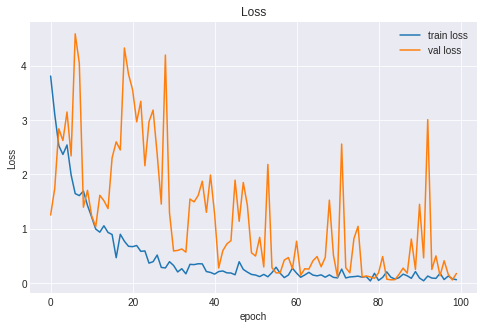

In [ ]:
# plotting the model loss on but the training set and validation se
epochs = range(len(loss))
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.legend()
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

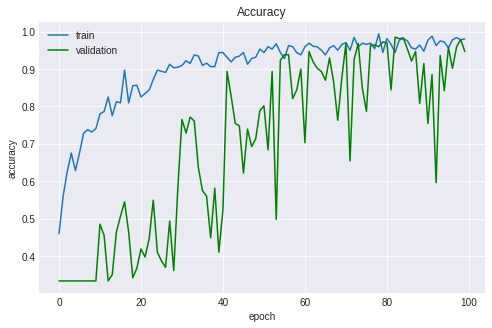

In [ ]:
# Plotting the models accuracy on but the training and validation set

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy, label='train')
plt.plot(epochs, val_accuracy, 'g', label='validation')
plt.legend()
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

## Evaluating the model on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate_generator(test_image_generator, steps=32,  verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


32/32 [==============================] - 8s 232ms/step - loss: 2214.9951 - accuracy: 0.5021


In [ ]:
print(f'Test Loss : {test_loss}\n Test Accuracy : {test_accuracy*100}')

Test Loss : 2214.9951171875
 Test Accuracy : 50.2136766910553
